In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
MinMaxScaler,
OneHotEncoder,
OrdinalEncoder,
StandardScaler,
PolynomialFeatures,
FunctionTransformer,
)
from sklearn.metrics import mean_squared_error, r2_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow import keras

In [303]:
df = pd.read_csv("C:/Users/Usuaria/Desktop/automatizacion/Laboratorio1/archive/train.csv")
print(df)

            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [305]:
df.drop(columns='id',inplace=True)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


In [307]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Aqui se observo la media,los maximos y minimos de las variables numericas en busqueda de casos raros 


In [308]:
df['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

No existe una tercera valor para la categoria Sex que puede afectar el entrenamiento 

<Axes: >

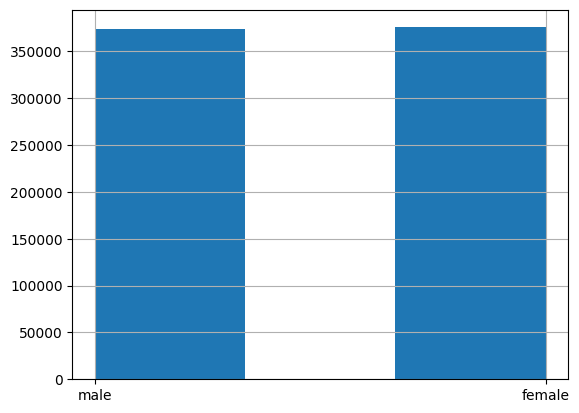

In [309]:
#Grafica 1
df['Sex'].hist(bins=3)

Que haya casi la misma cantidad de datos hombres y datos mujeres ayuda a evitar el sesgo, como por ejemplo que el modelo aprenda a predecir mejor el target de los hombres que el de las mujeres 

In [310]:
df.isna().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

No hay valores faltantes en el dataset que afecten el entrenamiento 

Text(0.5, 1.0, 'Ejercicio vs Frecuencia cardiaca')

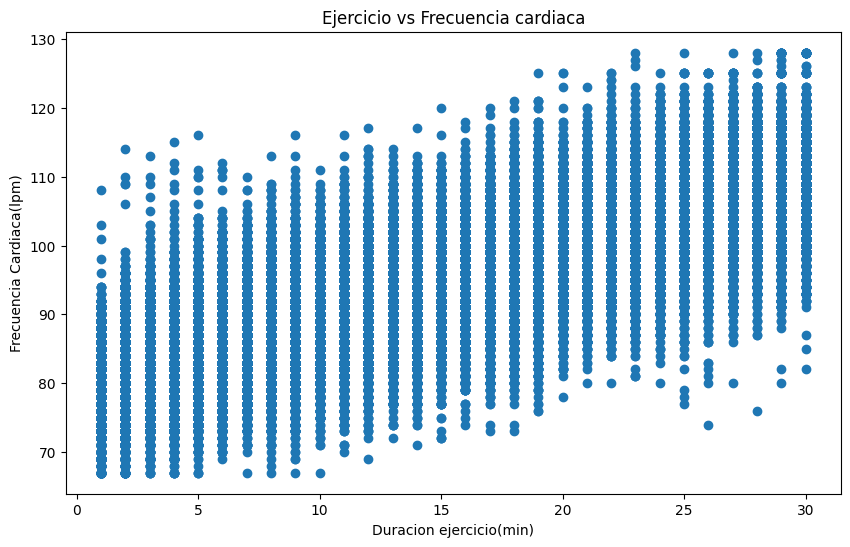

In [311]:
#Grafica 2
plt.figure(figsize=(10,6))
plt.scatter(df['Duration'],df['Heart_Rate'])
plt.xlabel('Duracion ejercicio(min)')
plt.ylabel('Frecuencia Cardiaca(lpm)')
plt.title('Ejercicio vs Frecuencia cardiaca')

En el grafico se observo una correlacion positiva entre los datos donde a mayor duracion del ejercicio mayor frecuencia cardiaca

Text(0.5, 1.0, 'Ejercicio vs Calorias quemadas')

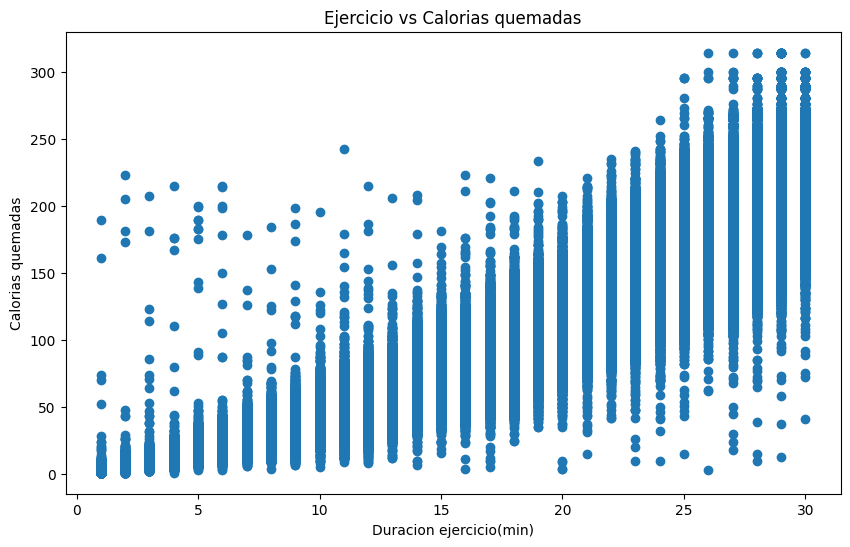

In [312]:
#Grafica 3
plt.figure(figsize=(10,6))
plt.scatter(df['Duration'],df['Calories'])
plt.xlabel('Duracion ejercicio(min)')
plt.ylabel('Calorias quemadas')
plt.title('Ejercicio vs Calorias quemadas')

Se observo una correlacion positiva entre el feature Duration y el traget lo que quiere decir que este es una carateristica importante para el aprendizaje del modelo 

In [313]:
#Division de datos 
rs=50

X_train,X_temp,Y_train,Y_temp=train_test_split(
df.drop(columns='Calories'),
 df['Calories'],
 test_size=0.2,
 random_state=rs,
   )

X_val,X_test, Y_val,Y_test=train_test_split(
X_temp,
Y_temp,
test_size=0.5,
 random_state=rs
)

In [314]:
#separacion de categoricos y numericos
cat_cols = X_train.select_dtypes(include=object).columns
num_cols = X_train.select_dtypes(include=np.number).columns

In [315]:
#pipelines
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])

categorical_transformer=Pipeline(steps=[('encoder',OneHotEncoder())])

preprocesador =ColumnTransformer(transformers=[
('num', numeric_transformer,num_cols),
('cat',categorical_transformer,cat_cols)])


In [316]:
#modelo Random Forest
rf_base=RandomForestRegressor(
random_state=rs,
n_estimators=100,
max_depth=5,
min_samples_leaf=10
)


rf=Pipeline(steps=[
('procesor',preprocesador),
('regressor',rf_base)
])


In [319]:
#modelo k-Nearest Neighbors
KNN_base=KNeighborsRegressor(
n_neighbors= 10,
weights= 'uniform',
metric= 'euclidean',
)

KNn=Pipeline(steps=[
('procesor',preprocesador),
('regressor',KNN_base)
])



In [322]:
#modelo Deep Neural Network
X_train_processed= preprocesador.fit_transform(X_train)
X_val_processed = preprocesador.transform(X_val)         
X_test_processed = preprocesador.transform(X_test)  

DNn=keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1),
])
DNn.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)


print("Shape de X_train_processed:", X_train_processed.shape)



Shape de X_train_processed: (600000, 8)


c:\Users\Usuaria\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [323]:
rf.fit(X_train, Y_train)
print('rf entrenado')
KNn.fit(X_train,Y_train)
print('KNN entrenado')
DNn.fit(
    X_train_processed,Y_train,
    epochs=500,
    batch_size=1024,
    validation_data=(X_val_processed, Y_val),
    validation_batch_size=len(X_val_processed)
)
print('DNn entrenado')

rf entrenado
KNN entrenado
Epoch 1/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10099.7207 - mae: 85.2982 - val_loss: 9058.1328 - val_mae: 83.7916
Epoch 2/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6666.6123 - mae: 73.1906 - val_loss: 4872.6597 - val_mae: 65.9035
Epoch 3/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3274.6199 - mae: 54.5467 - val_loss: 2089.2725 - val_mae: 45.3638
Epoch 4/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1261.7327 - mae: 34.7686 - val_loss: 614.8594 - val_mae: 24.4603
Epoch 5/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 350.8667 - mae: 17.6864 - val_loss: 131.0536 - val_mae: 10.8676
Epoch 6/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64.8398 - mae: 6.7857 - val_loss: 32.1916 - val_mae: 4.6835
Epoch 7/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.8500 - mae: 3.2678 - val_loss: 15.7420 - val_mae: 2.3162
Epoch 8/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.5149 - mae: 2.9728 - val_loss: 16.

In [324]:
print("Training set")
for model in (rf, KNn):
 y_train_pred_model=model.predict(X_train)
 if model == rf:
    name = 'Random Forest'
    MSe_rf_train=mean_squared_error(Y_train,y_train_pred_model)
    r2_rf_train=r2_score(Y_train,y_train_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_rf_train}')
    print(f'r2:{r2_rf_train}')
    print('\n')

 else:
    name = 'k-Nearest Neighbors'
    MSe_KNn_train=mean_squared_error(Y_train,y_train_pred_model)
    r2_KNn_train=r2_score(Y_train,y_train_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_KNn_train}')
    print(f'r2:{r2_KNn_train}')
    print('\n')


print("Test set")
for model in (rf, KNn):
 y_test_pred_model=model.predict(X_test)
 if model == rf:
    name = 'Random Forest'
    MSe_rf_test=mean_squared_error(Y_test,y_test_pred_model)
    r2_rf_test=r2_score(Y_test,y_test_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_rf_test}')
    print(f'r2:{r2_rf_test}')
    print('\n')
 else:
    name = 'k-Nearest Neighbors'
    MSe_KNn_test=mean_squared_error(Y_test,y_test_pred_model)
    r2_KNn_test=r2_score(Y_test,y_test_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_KNn_test}')
    print(f'r2:{r2_KNn_test}')
    print('\n')


print("Val set")
for model in (rf, KNn):
 y_val_pred_model=model.predict(X_val)
 if model == rf:
    name = 'Random Forest'
    MSe_rf_val=mean_squared_error(Y_val,y_val_pred_model)
    r2_rf_val=r2_score(Y_val,y_val_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_rf_val}')
    print(f'r2:{r2_rf_val}')
    print('\n')    
 else:
    name = 'k-Nearest Neighbors'
    MSe_KNn_val=mean_squared_error(Y_val,y_val_pred_model)
    r2_KNn_val=r2_score(Y_val,y_val_pred_model)
    print(f'Model:{name}')
    print(f'MSE:{ MSe_KNn_val}')
    print(f'r2:{r2_KNn_val}')
    print('\n')



Training set
Model:Random Forest
MSE:121.3158387647233
r2:0.9688505159295885


Model:k-Nearest Neighbors
MSE:15.054707716666664
r2:0.9961344999714796


Test set
Model:Random Forest
MSE:123.3873841514195
r2:0.9682298035528264


Model:k-Nearest Neighbors
MSE:19.265051333333336
r2:0.9950395701340602


Val set
Model:Random Forest
MSE:123.96746189679133
r2:0.9681387201389922


Model:k-Nearest Neighbors
MSE:19.955706666666668
r2:0.9948711190404125




In [325]:
print(f"Rango: {df['Calories'].max() - df['Calories'].min()}")

Rango: 313.0


In [326]:
print("Training set")
name=('Deep Neutral Network')
y_train_pred_DNn=DNn.predict(X_train_processed)
MSe_DNn_train=mean_squared_error(Y_train,y_train_pred_DNn)
r2_DNn_train=r2_score(Y_train,y_train_pred_DNn)
print(f'Model:{name}')
print(f'MSE:{MSe_DNn_train}')
print(f'r2:{r2_DNn_train}')
print('\n')

print("Test set")
name=('Deep Neutral Network')
y_test_pred_DNn=DNn.predict(X_test_processed)
MSe_DNn_test=mean_squared_error(Y_test,y_test_pred_DNn)
r2_DNn_test=r2_score(Y_test,y_test_pred_DNn)
print(f'Model:{name}')
print(f'MSE:{MSe_DNn_test}')
print(f'r2:{r2_DNn_test}')
print('\n')

print("Val set")
name=('Deep Neutral Network')
y_val_pred_DNn=DNn.predict(X_val_processed)
MSe_DNn_val=mean_squared_error(Y_val,y_val_pred_DNn)
r2_DNn_val=r2_score(Y_val,y_val_pred_DNn)
print(f'Model:{name}')
print(f'MSE:{MSe_DNn_val }')
print(f'r2:{r2_DNn_val}')
print('\n')


Training set
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 9s 450us/step
Model:Deep Neutral Network
MSE:14.466330723424145
r2:0.9962855737303971


Test set
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step
Model:Deep Neutral Network
MSE:15.503548724627024
r2:0.99600809440935


Val set
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step
Model:Deep Neutral Network
MSE:16.107165972941672
r2:0.99586024497897




In [327]:
#comparacion traing
datos1={
    'Modelo':['Random Forest','k-Nearest Neighbors','Deep Neutral Network'],
    'MSE':[MSe_rf_train,MSe_KNn_train,MSe_DNn_train],
    'r2':[r2_rf_train,r2_KNn_train,r2_DNn_train]

}
tabla1=pd.DataFrame(datos1)
print(tabla1)

                 Modelo         MSE        r2
0         Random Forest  121.315839  0.968851
1   k-Nearest Neighbors   15.054708  0.996134
2  Deep Neutral Network   14.466331  0.996286


In [328]:
#comparacion test 
datos2={
    'Modelo':['Random Forest','k-Nearest Neighbors','Deep Neutral Network'],
    'MSE':[MSe_rf_test,MSe_KNn_test,MSe_DNn_test],
    'r2':[r2_rf_test,r2_KNn_test,r2_DNn_test]
}
tabla2=pd.DataFrame(datos2)
print(tabla2)

                 Modelo         MSE        r2
0         Random Forest  123.387384  0.968230
1   k-Nearest Neighbors   19.265051  0.995040
2  Deep Neutral Network   15.503549  0.996008


In [329]:
#comparacion val 
datos3={
    'Modelo':['Random Forest','k-Nearest Neighbors','Deep Neutral Network'],
    'MSE':[MSe_rf_val,MSe_KNn_val,MSe_DNn_val],
    'r2':[r2_rf_val,r2_KNn_val,r2_DNn_val]
}
tabla3=pd.DataFrame(datos3)
print(tabla3)

                 Modelo         MSE        r2
0         Random Forest  123.967462  0.968139
1   k-Nearest Neighbors   19.955707  0.994871
2  Deep Neutral Network   16.107166  0.995860


In [330]:
datos4={
    'Modelo':['Random Forest','k-Nearest Neighbors','Deep Neutral Network'],
    'Dif_MSE':[MSe_rf_val-MSe_rf_train,MSe_KNn_val-MSe_KNn_train,MSe_DNn_val-MSe_DNn_train],
    'Dif_r2':[r2_rf_train-r2_rf_val,r2_KNn_train-r2_KNn_val,r2_DNn_train-r2_DNn_val]
}
tabla4=pd.DataFrame(datos4)
print(tabla4)

                 Modelo   Dif_MSE    Dif_r2
0         Random Forest  2.651623  0.000712
1   k-Nearest Neighbors  4.900999  0.001263
2  Deep Neutral Network  1.640835  0.000425


In [331]:
dato_prueba=pd.DataFrame({
    'Sex':['male'],
    'Age':[50],
    'Height':[170.0],
    'Weight':[80.0],
    'Duration':[20.0],
    'Heart_Rate':[104.0],
    'Body_Temp':[38.3],
})

dato_prueba_processed=preprocesador.transform(dato_prueba)
y_predict=DNn.predict(dato_prueba_processed)
print(y_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[126.704704]]


In [332]:
df.head(10)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,male,65,185.0,88.0,23.0,104.0,41.0,185.0
